<a href="https://colab.research.google.com/github/SanePai/Neural_Networks-Assignment-1/blob/master/Question_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd "/content/drive/My Drive/NNFL"
!ls

/content/drive/My Drive/NNFL
assignment1.pdf  data4.xlsx		   training_feature_matrix.xlsx
data2.xlsx	 test_feature_matrix.xlsx  training_output.xlsx
data3.xlsx	 test_output.xlsx


In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import math

In [3]:
df = pd.read_excel("data2.xlsx", header = None)
X = np.array(df)
#Number of Clusters
K = 3
m,n = np.shape(X) #m = instances, n = features

In [4]:
def calc_distance(A,B):
  return np.linalg.norm(A-B,2)
#random centers
index_random = np.random.randint(0,m,3)
C1 = X[index_random[0]]
C2 = X[index_random[1]]
C3 = X[index_random[2]]
print(C1,C2,C3)

#New centers
NC1 = np.zeros(4)
NC2 = np.zeros(4)
NC3 = np.zeros(4)

#converged state bool
st = False

while True:
  if st is True:
    break
  Cluster1_ind = []
  Cluster2_ind = []
  Cluster3_ind = []
  for i in range(0,m):
    d1 = calc_distance(X[i], C1)
    d2 = calc_distance(X[i], C2)
    d3 = calc_distance(X[i], C3)
    d = np.array([d1,d2,d3])
    index = np.argmin(d)
    if index == 0:
      Cluster1_ind.append(i)
    elif index == 1:
      Cluster2_ind.append(i)
    elif index == 2:
      Cluster3_ind.append(i)
  
  for j in range(len(Cluster1_ind)):
    NC1 += X[Cluster1_ind[j]]
  NC1 /= len(Cluster1_ind)

  for j in range(len(Cluster2_ind)):
    NC2 += X[Cluster2_ind[j]]
  NC2 /= len(Cluster2_ind)

  for j in range(len(Cluster3_ind)):
    NC3 += X[Cluster3_ind[j]]
  NC3 /= len(Cluster3_ind)
  
  if (NC1==C1).all() and (NC2==C2).all() and (NC3==C3).all():
    st = True
  C1 = NC1
  C2 = NC2
  C3 = NC3

  print(st)

print("Centroids:",C1,C2,C3)

[5.2 3.5 1.5 0.2] [5.6 3.  4.5 1.5] [6.7 3.1 5.6 2.4]
False
True
Centroids: [5.10612 3.48636 1.49328 0.24888] [5.97996666 2.78596832 4.46010003 1.45754376] [7.02858036 3.15528455 5.86110069 2.10662914]


In [5]:
Cluster1 = [X[i] for i in Cluster1_ind]
Cluster2 = [X[i] for i in Cluster2_ind]
Cluster3 = [X[i] for i in Cluster3_ind]

In [6]:
X1_C1 = [Cluster1[i][0] for i in range(len(Cluster1))]
X2_C1 = [Cluster1[i][1] for i in range(len(Cluster1))]
X3_C1 = [Cluster1[i][2] for i in range(len(Cluster1))]
X4_C1 = [Cluster1[i][3] for i in range(len(Cluster1))]

X1_C2 = [Cluster2[i][0] for i in range(len(Cluster2))]
X2_C2 = [Cluster2[i][1] for i in range(len(Cluster2))]
X3_C2 = [Cluster2[i][2] for i in range(len(Cluster2))]
X4_C2 = [Cluster2[i][3] for i in range(len(Cluster2))]

X1_C3 = [Cluster3[i][0] for i in range(len(Cluster3))]
X2_C3 = [Cluster3[i][1] for i in range(len(Cluster3))]
X3_C3 = [Cluster3[i][2] for i in range(len(Cluster3))]
X4_C3 = [Cluster3[i][3] for i in range(len(Cluster3))]


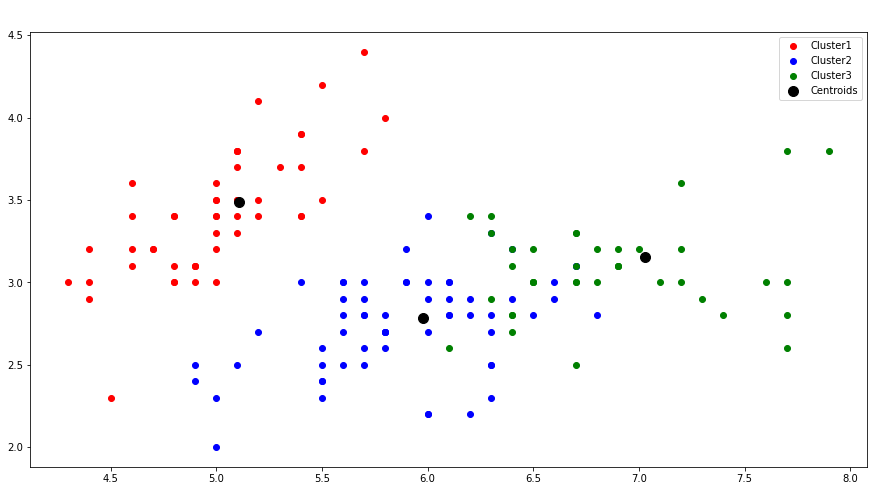

In [7]:
plt.figure(figsize=(15,8))
plt.scatter(X1_C1,X2_C1, color='red', label = 'Cluster1')
plt.scatter(X1_C2,X2_C2, color='blue', label = 'Cluster2')
plt.scatter(X1_C3,X2_C3, color='green', label = 'Cluster3')
plt.scatter([C1[0],C2[0],C3[0]], [C1[1], C2[1], C3[1]], s = 100, color = 'black', label = 'Centroids')
plt.legend()
plt.title("Feature 1", fontsize = 24, color = 'white')
plt.show()


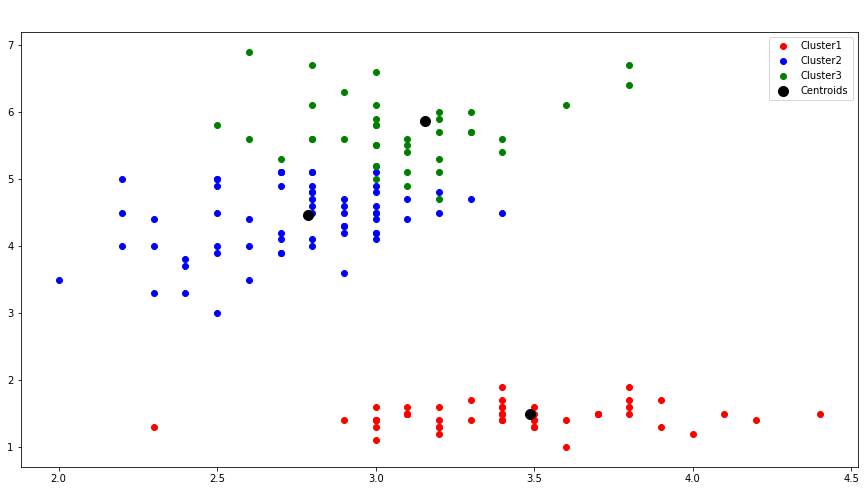

In [8]:
plt.figure(figsize=(15,8))
plt.scatter(X2_C1,X3_C1, color='red', label = 'Cluster1')
plt.scatter(X2_C2,X3_C2, color='blue', label = 'Cluster2')
plt.scatter(X2_C3,X3_C3, color='green', label = 'Cluster3')
plt.scatter([C1[1],C2[1],C3[1]], [C1[2], C2[2], C3[2]], s = 100, color = 'black', label = 'Centroids')
plt.legend()
plt.title("Feature 2", fontsize = 24, color = 'white')
plt.show()


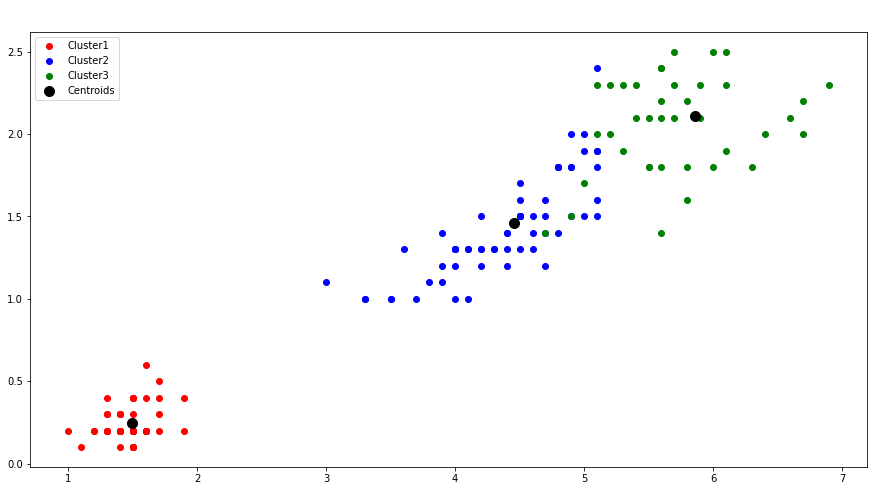

In [9]:
plt.figure(figsize=(15,8))
plt.scatter(X3_C1,X4_C1, color='red', label = 'Cluster1')
plt.scatter(X3_C2,X4_C2, color='blue', label = 'Cluster2')
plt.scatter(X3_C3,X4_C3, color='green', label = 'Cluster3')
plt.scatter([C1[2],C2[2],C3[2]], [C1[3], C2[3], C3[3]], s = 100, color = 'black', label = 'Centroids')
plt.legend()
plt.title("Feature 3", fontsize = 24, color = 'white')
plt.show()


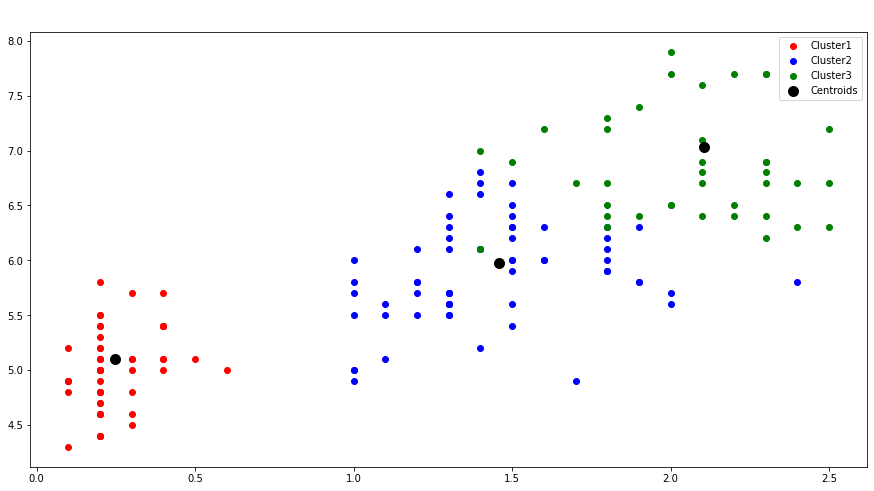

In [10]:
plt.figure(figsize=(15,8))
plt.scatter(X4_C1,X1_C1, color='red', label = 'Cluster1')
plt.scatter(X4_C2,X1_C2, color='blue', label = 'Cluster2')
plt.scatter(X4_C3,X1_C3, color='green', label = 'Cluster3')
plt.scatter([C1[3],C2[3],C3[3]], [C1[0], C2[0], C3[0]], s = 100, color = 'black', label = 'Centroids')
plt.legend()
plt.title("Feature 4", fontsize = 24, color = 'white')
plt.show()
